In [5]:
import codecs
from collections import defaultdict
import csv
import lzma
import operator
import re
from statistics import mean
import sys
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/waren/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
PATH_TO_CSV = "/home/waren/sourced/data/sourced_datasets/review_comments.csv.xz"

## Basic statistics

In [3]:
def getusers(filename):
    with lzma.open(filename) as archf:
        reader = csv.DictReader(codecs.getreader("utf-8")(archf))
        for record in reader:
            yield record["AUTHOR"]

In [4]:
n_comments = 0
users = defaultdict(int)
for user in getusers(PATH_TO_CSV):
    n_comments += 1
    if n_comments % 100000 == 0:
        sys.stderr.write("%d\r" % n_comments)
    users[user] += 1

In [97]:
print("Number of PR review comments: %d" % (n_comments))
print("Number of different reviewers: %d" % (len(users)))
print("Average number of GitHub review comments per user from 2015 to 2019: %d" % (mean(list(users.values()))))

Number of PR review comments: 25323640
Number of different reviewers: 540054
Average number of GitHub review comments per user from 2015 to 2019: 46


## Most active reviewers

In [98]:
sorted_users = sorted(users.items(), key=operator.itemgetter(1), reverse=True)
sorted_users[:10]

[('houndci-bot', 797827),
 ('houndci', 264998),
 ('codacy-bot', 237814),
 ('stickler-ci', 36707),
 ('sonarcloud[bot]', 20378),
 ('jreback', 19694),
 ('seanlip', 19540),
 ('codeschool-kiddo', 18946),
 ('stephentoub', 18744),
 ('vkurennov', 18141)]

## Number of review comments about typos

In [175]:
topics = {}
topics["typos"] = r"(?i)\b(typo|misprint|s/)\b"
topics["doc"] = r"(?i)\b(doc|comment)\b"
topics["quotes"] = r"(?i)\b(quote)\b"
topics["tabs"] = r"(?i)\b(tab)\b"
topics["spacing"] = r"(?i)\b(space|spacing)\b"
topics["format"] = r"(?i)\b(format)\b"
topics["empty line"] = r"(?i)\b(empty line)\b"
topics["style"] = r"(?i)\b(style)\b"
topics["newline"] = r"(?i)\b(newline)\b"
topics["indentation"] = r"(?i)\b(indentation)\b"
topics["too long"] = r"(?i)\b(too long)\b"
topics["blank"] = r"(?i)\b(blank)\b"
topics["align"] = r"(?i)\b(align)\b"
topics["missing"] = r"(?i)\b(missing)\b"
topics["trailing"] = r"(?i)\b(trailing)\b"
topics["comma"] = r"(?i)\b(comma)\b"
topics["line break"] = r"(?i)\b(line break)\b"

In [169]:
for topic, comments_topic in comments.items():
    print("%s : %.2f%%" % (topic, 100 * len(comments_topic) / c))

doc : 3.24%
style : 1.07%
format : 0.60%
spacing : 1.30%
newline : 0.29%
missing : 1.61%
trailing : 0.40%
quotes : 0.09%
indentation : 0.65%
too long : 0.69%
typos : 0.77%
tabs : 0.20%
align : 0.20%
comma : 0.25%
blank : 0.38%
empty line : 0.26%
line break : 0.05%


In [156]:
c = 0
comments = defaultdict(list)
with lzma.open(PATH_TO_CSV) as archf:
    reader = csv.DictReader(codecs.getreader("utf-8")(archf))
    for record in reader:
        c += 1
        if c % 10000 == 0:
            sys.stderr.write("%d\r" % c)
        try:
            for topic, regexp in topics.items():
                if re.search(regexp, record["BODY"]):
                    comments[topic].append(record["BODY"])
        except TypeError:
            continue

In [174]:
c

12868638

In [166]:
comments["typos"][:10]

['There is a slight typo here. I will point it out to you in class',
 's/problems/problem',
 '@Nylanfs \r\nUh... Summoner slayer syes? Is this intentional or a typo?',
 'This sentence is hard to comprehend. Also s/mean/means that/ if you decide to keep it as it is.',
 "s/don't get/cannot receive/",
 "It's a better practice to put constant first in a comparison. Consider this comparison typo issue:\r\n``` javascript\r\nif (attribute = 'aValue')\r\n```\r\n``` javascript\r\nif ('aValue' = attribute)\r\n```\r\nThe second form is really easier to detect\r\n\r\nBut I can change it if it breaks project coding style",
 's/obejcts/objects/',
 'UNI_TIMESTAMP is that a typo ?',
 'typo ;) "vestivals"',
 'typo']

## Visuals

In [178]:
topics = ["typos", "doc", "tab/space", "line fromatting", "quotes"]
values = [0.77, 3.24, 1.5, 1.29, 0.09]
#values = [100 * v/sum(values) for v in values]

In [195]:
x.shape[0]

6

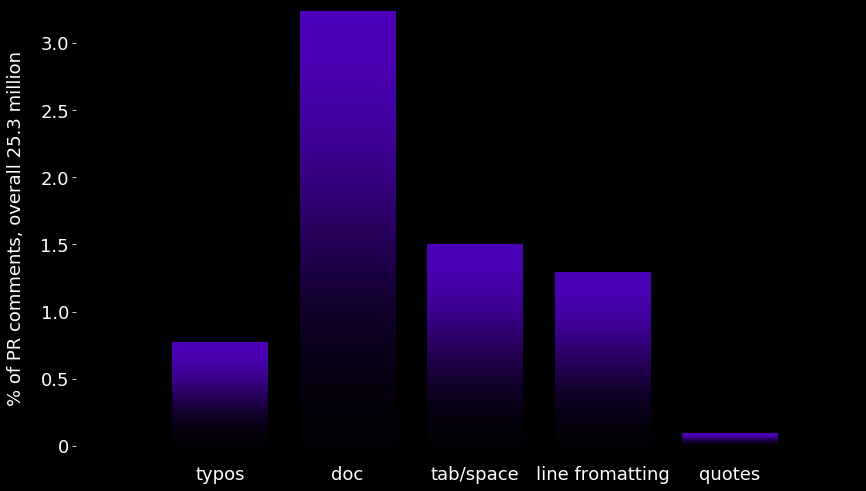

In [206]:
from matplotlib.colors import LinearSegmentedColormap

width = 1.5
x = np.arange(width, 2*(len(topics) + 1), 2)
cmap = LinearSegmentedColormap.from_list('custom purple', ['#5000BF' ,'#000000'], N=256)

def gbar(ax, x, y, width=0.5, bottom=0):
    X = [[.6, .6], [.7, .7]]
    for left, top in zip(x, y):
        right = left + width
        ax.imshow(X, interpolation='bicubic', cmap=cmap,
                  extent=(left, right, bottom, top), alpha=1)

xlim = 0, x.shape[0]
ylim = 0, max(values)
figure(figsize=(14, 8))
ax = subplot(111)

style.use('dark_background')
ax.set(xlim=xlim, ylim=ylim, autoscale_on=False)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="y",length=4)
ax.tick_params(axis="x",length=0)

ax.set_ylabel("% of PR comments, overall 25.3 million", fontsize=18, labelpad=15)
ax.set_yticklabels([0,0.5,1.0, 1.5, 2.0, 2.5, 3.0], fontsize=18)
xticks(x + width / 2, topics, fontsize=18)
ax.tick_params(axis='x', which='major', pad=20)

gbar(ax, x, values, width=width)
ax.set_aspect('auto')
savefig("review_comments.svg")